## This notebook is forked and edited from [PANDA - EDA + Better Visualization+Simple Baseline](https://www.kaggle.com/rohitsingh9990/panda-eda-better-visualization-simple-baseline). The purpose for this notebook is to do a simple Exploratory Data Analysis (EDA).

# 1. Getting started with the PANDA dataset

This notebook shows a few methods to load and display images from the PANDA challenge dataset. The dataset consists of around 11.000 whole-slide images (WSI) of prostate biopsies from Radboud University Medical Center and the Karolinska Institute. 

In [1]:
import os

# There are two ways to load the data from the PANDA dataset:
# Option 1: Load images using openslide
import openslide
# Option 2: Load images using skimage (requires that tifffile is installed) ## have troubles on desktop
import skimage.io


# General packages
import pandas as pd
import numpy as np
import random
import seaborn as sns
import cv2
import matplotlib
import matplotlib.pyplot as plt
import PIL
from IPython.display import Image, display

## 2. Loading Dataset

In [2]:
# Location of the training images
BASE_PATH = './input/prostate-cancer-grade-assessment'

# image and mask directories
data_dir = f'{BASE_PATH}/train_images'
mask_dir = f'{BASE_PATH}/train_label_masks'

# Location of training labels
train = pd.read_csv(f'{BASE_PATH}/train.csv').set_index('image_id')
test = pd.read_csv(f'{BASE_PATH}/test.csv')
submission = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')

In [3]:
display(train.head())
print("Shape of training data :", train.shape)
print("unique data provider :", len(train.data_provider.unique()))
print("unique isup_grade(target) :", len(train.isup_grade.unique()))
print("unique gleason_score :", len(train.gleason_score.unique()))

,data_provider,isup_grade,gleason_score
image_id,,,
0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


Shape of training data : (10616, 3)
unique data provider : 2
unique isup_grade(target) : 6
unique gleason_score : 11


In [4]:
train.isna().sum()

data_provider    0
isup_grade       0
gleason_score    0
dtype: int64

In [5]:
display(test.head())
print("Shape of testing data :", test.shape)
print("unique data provider :", len(test.data_provider.unique()))

,image_id,data_provider
0,005700be7e06878e6605e7a5a39de1b2,radboud
1,005c6e8877caf724c600fdce5d417d40,karolinska
2,0104f76634ff89bfff1ef0804a95c380,radboud


Shape of testing data : (3, 2)
unique data provider : 2


### Output Variables

* `isup_grade`: The target variable. The severity of the cancer on a 0-5 scale.
* `gleason_score`: Train only. An alternate cancer severity rating system with more levels than the ISUP scale. For details on how the gleason and ISUP systems compare, see the Additional Resources tab.

![](https://storage.googleapis.com/kaggle-media/competitions/PANDA/Screen%20Shot%202020-04-08%20at%202.03.53%20PM.png)

### Note: There are no test images publically available.
Only a **test.csv** with 3 items inside is available.

## 3. Basic EDA (Exploratory Data Analysis)

In [6]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

In [10]:
def plot_relative_distribution(df, feature, hue, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(x=feature, hue=hue, data=df, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

### 3.1 Checking for `data provider` distribution

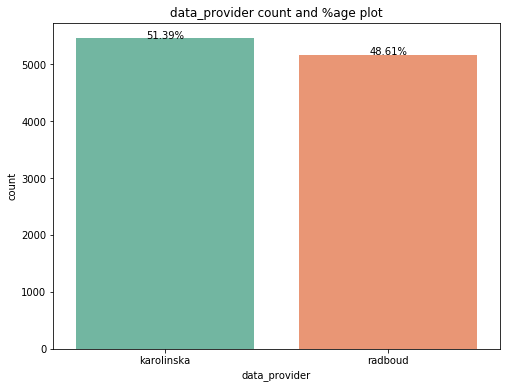

In [7]:
plot_count(df=train, feature='data_provider', title = 'data_provider count and %age plot')

### 3.2 Checking for `isup_grade` distribution

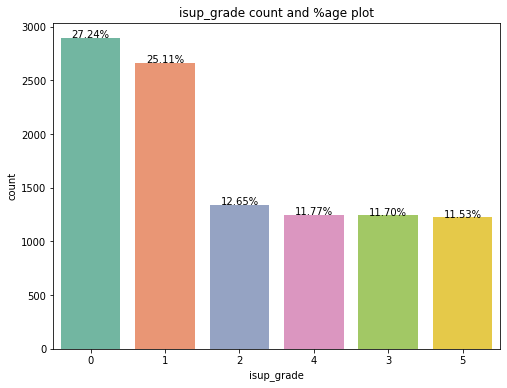

In [8]:
plot_count(df=train, feature='isup_grade', title = 'isup_grade count and %age plot')

**Analysis:**

* Majority of data samples in train set have ISUP grade values 0 or 1 (total > 50%).
* Rest of the data samples have associated ISUP grades from 2 to 5 with all ranging in the 11-12% each.
* Dataset is not balanced in terms of isup_grade.

### 3.3 Checking for `gleason_score` distribution

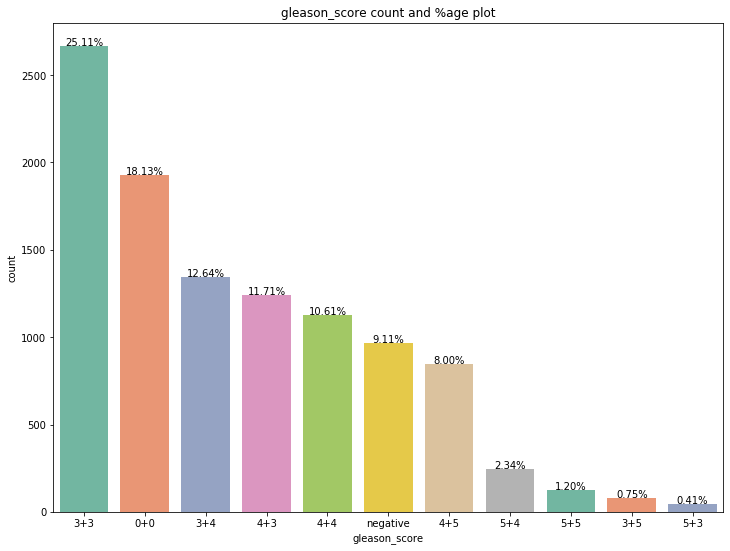

In [9]:
plot_count(df=train, feature='gleason_score', title = 'gleason_score count and %age plot', size=3)

**Analysis:** 

* From above graph, it is clear that gleason_score distribution is not uniform.
* Few gleason_score like (3+3) and (0+0) are more frequent while others like (3+5) and (5+3) are very rare in this dataset.
* Dataset is not balanced in terms of gleason_score.

### 3.4 Let's check for relative distribution of `isup_grade` and `data_provider`

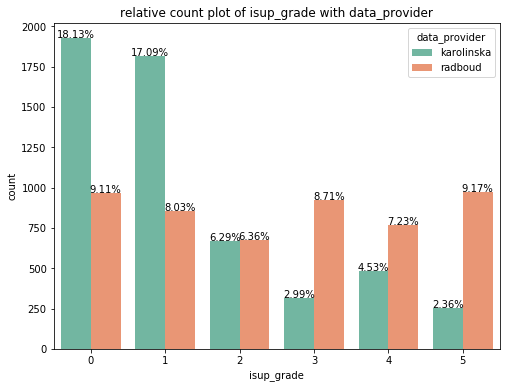

In [11]:
plot_relative_distribution(df=train, feature='isup_grade', hue='data_provider', title = 'relative count plot of isup_grade with data_provider', size=2)

**Analysis:**

* In isup_grade category 0 and 1 most of the data is provided by `karolinska`.
* In isup_grade category 3,4 and 5 most of the data is provided by `radbound`.

### 3.5 Let's check for relative distribution of `gleason_score` and `data_provider`

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


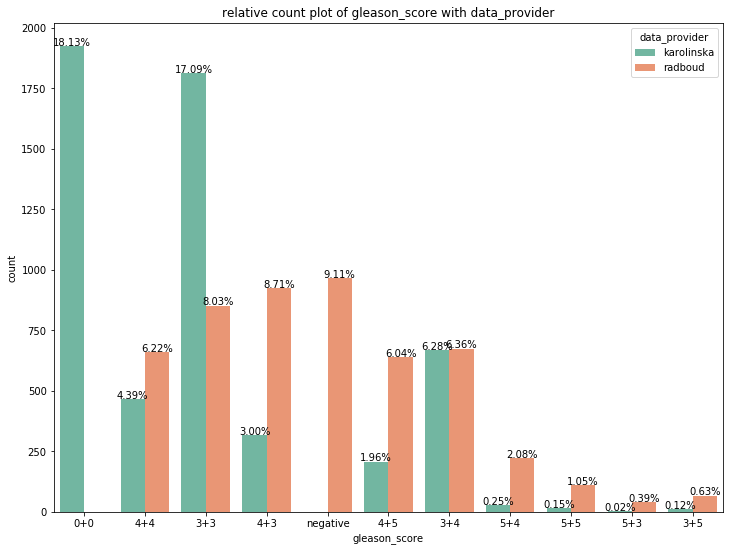

In [12]:
plot_relative_distribution(df=train, feature='gleason_score', hue='data_provider', title = 'relative count plot of gleason_score with data_provider', size=3)

**Analysis:**

* In gleason_score category (0+0), all the data is provided by `karolinska`.
* In gleason_score category (negative), all the data is provided by `radbound`.
* Also in gleason_score category (3+3), karolinska is major data provider.
* On the other hand radbound is major data provider for (4+4), (4+3), (4+5), (5+4), (5+5), (5+3), (3+5).

### 3.6 Let's check for relative distribution of `isup_grade` and `gleason_score`

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

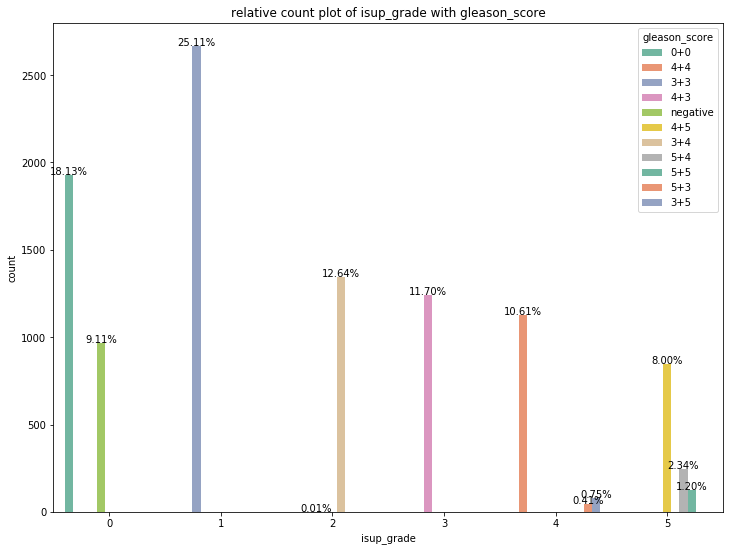

In [14]:
plot_relative_distribution(df=train, feature='isup_grade', hue='gleason_score', title = 'relative count plot of isup_grade with gleason_score', size=3)

**Analysis:**

* All exams with ISUP grade = 0 have Gleason score 0+0 or negative.
* All exams with ISUP grade = 1 have Gleason score 3+3.
* All exams with ISUP grade = 2 have Gleason score 3+4.
* All exams with ISUP grade = 3 have Gleason score 4+3.
* All exams with ISUP grade = 4 have Gleason score 4+4 (majority), 3+5 or 5+3.
* All exams with ISUP grade = 5 have Gleason score 4+5 (majority), 5+4 or 5+5.

## 4. Quickly displaying few images

In the following sections we will load data from the slides with [OpenSlide](https://openslide.org/api/python/). The benefit of OpenSlide is that we can load arbitrary regions of the slide, without loading the whole image in memory. 

You can read more about the OpenSlide python bindings in the documentation: https://openslide.org/api/python/

In [30]:
def display_images(slides): 
    N = len(slides)
    f, ax = plt.subplots(N//3, 3, figsize=(18,22))
    for i, slide in enumerate(slides):
        if i > N//3 * 3:
            break
        image = openslide.OpenSlide(os.path.join(data_dir, f'{slide}.tiff'))
#         patch = image.read_region((1780,1950), 0, (256, 256))
        patch = image.read_region((0,0), image.level_count - 1, (2**11,2**11))
        ax[i//3, i%3].imshow(patch) if i //3 > 1 else ax[i%3].imshow(patch)
        image.close()       
        ax[i//3, i%3].axis('off') if i //3 > 1 else ax[i%3].axis('off')
        
        image_id = slide
        data_provider = train.loc[slide, 'data_provider']
        isup_grade = train.loc[slide, 'isup_grade']
        gleason_score = train.loc[slide, 'gleason_score']
        ax[i//3, i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")\
        if i //3 > 1 else ax[i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")

    plt.show() 

In [31]:
# images = [
#     '07a7ef0ba3bb0d6564a73f4f3e1c2293',
#     '037504061b9fba71ef6e24c48c6df44d',
#     '035b1edd3d1aeeffc77ce5d248a01a53',
#     '059cbf902c5e42972587c8d17d49efed',
#     '06a0cbd8fd6320ef1aa6f19342af2e68',
#     '06eda4a6faca84e84a781fee2d5f47e1',
#     '0a4b7a7499ed55c71033cefb0765e93d',
#     '0838c82917cd9af681df249264d2769c',
#     '046b35ae95374bfb48cdca8d7c83233f',
#     '074c3e01525681a275a42282cd21cbde',
#     '05abe25c883d508ecc15b6e857e59f32',
#     '05f4e9415af9fdabc19109c980daf5ad',
#     '060121a06476ef401d8a21d6567dee6d',
#     '068b0e3be4c35ea983f77accf8351cc8',
#     '08f055372c7b8a7e1df97c6586542ac8'
# ]
# display_images(images)

#### Test samples on desktop

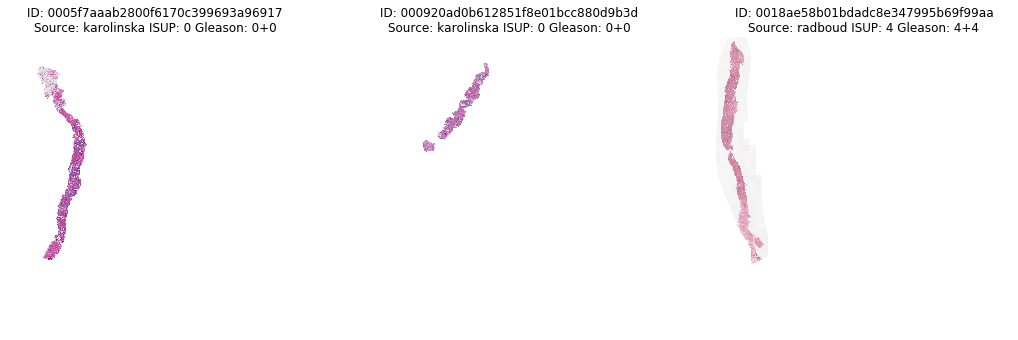

In [32]:
images = [
    '0005f7aaab2800f6170c399693a96917',
    '000920ad0b612851f8e01bcc880d9b3d',
    '0018ae58b01bdadc8e347995b69f99aa'
]
display_images(images)

> Few Insights:
   - The image dimensions are quite large (typically between 5,000 and 40,000 pixels in both x and y).
   - Each slide has 3 levels you can load, corresponding to a downsampling of 1, 4 and 16. Intermediate levels can be created by downsampling a higher resolution level.
   - The dimensions of each level differ based on the dimensions of the original image.
   - Biopsies can be in different rotations. This rotation has no clinical value, and is only dependent on how the biopsy was collected in the lab.
   - There are noticable color differences between the biopsies, this is very common within pathology and is caused by different laboratory procedures.

## 5. Loading label masks

Apart from the slide-level label (present in the csv file), almost all slides in the training set have an associated mask with additional label information. These masks directly indicate which parts of the tissue are healthy and which are cancerous. The information in the masks differ from the two centers:

- **Radboudumc**: Prostate glands are individually labelled. Valid values are:
  - 0: background (non tissue) or unknown
  - 1: stroma (connective tissue, non-epithelium tissue)
  - 2: healthy (benign) epithelium"
  - 3: cancerous epithelium (Gleason 3)
  - 4: cancerous epithelium (Gleason 4)
  - 5: cancerous epithelium (Gleason 5)
- **Karolinska**: Regions are labelled. Valid values:
  - 0: background (non tissue) or unknown
  - 1: benign tissue (stroma and epithelium combined)
  - 2: cancerous tissue (stroma and epithelium combined)

The label masks of Radboudumc were semi-automatically generated by several deep learning algorithms, contain noise, and can be considered as weakly-supervised labels. The label masks of Karolinska were semi-autotomatically generated based on annotations by a pathologist.

The label masks are stored in an RGB format so that they can be easily opened by image readers. **The label information is stored in the red (R) channel**, the other channels are set to zero and can be ignored. As with the slides itself, the label masks can be opened using OpenSlide.

### Visualizing masks (using matplotlib)
Given that the masks are just integer matrices, you can also use other packages to display the masks. For example, using matplotlib and a custom color map we can quickly visualize the different cancer regions:

In [34]:
def display_masks(slides):
    N = len(slides)
    f, ax = plt.subplots(N//3,3, figsize=(18,22))
    for i, slide in enumerate(slides):
        if i > N//3 * 3:
            break
        mask = openslide.OpenSlide(os.path.join(mask_dir, f'{slide}_mask.tiff'))
        mask_data = mask.read_region((0,0), mask.level_count - 1, mask.level_dimensions[-1])
        cmap = matplotlib.colors.ListedColormap(['black', 'gray', 'green', 'yellow', 'orange', 'red'])
        if N // 3 > 1:
            ax[i//3, i%3].imshow(np.asarray(mask_data)[:,:,0], cmap=cmap, interpolation='nearest', vmin=0, vmax=5)            
            ax[i//3, i%3].axis('off')
        else:
            ax[i%3].imshow(np.asarray(mask_data)[:,:,0], cmap=cmap, interpolation='nearest', vmin=0, vmax=5)            
            ax[i%3].axis('off')
        mask.close()    
        
        image_id = slide
        data_provider = train.loc[slide, 'data_provider']
        isup_grade = train.loc[slide, 'isup_grade']
        gleason_score = train.loc[slide, 'gleason_score']
        if N // 3 > 1:
            ax[i//3, i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")
        else:
            ax[i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")
        f.tight_layout()
        
    plt.show()

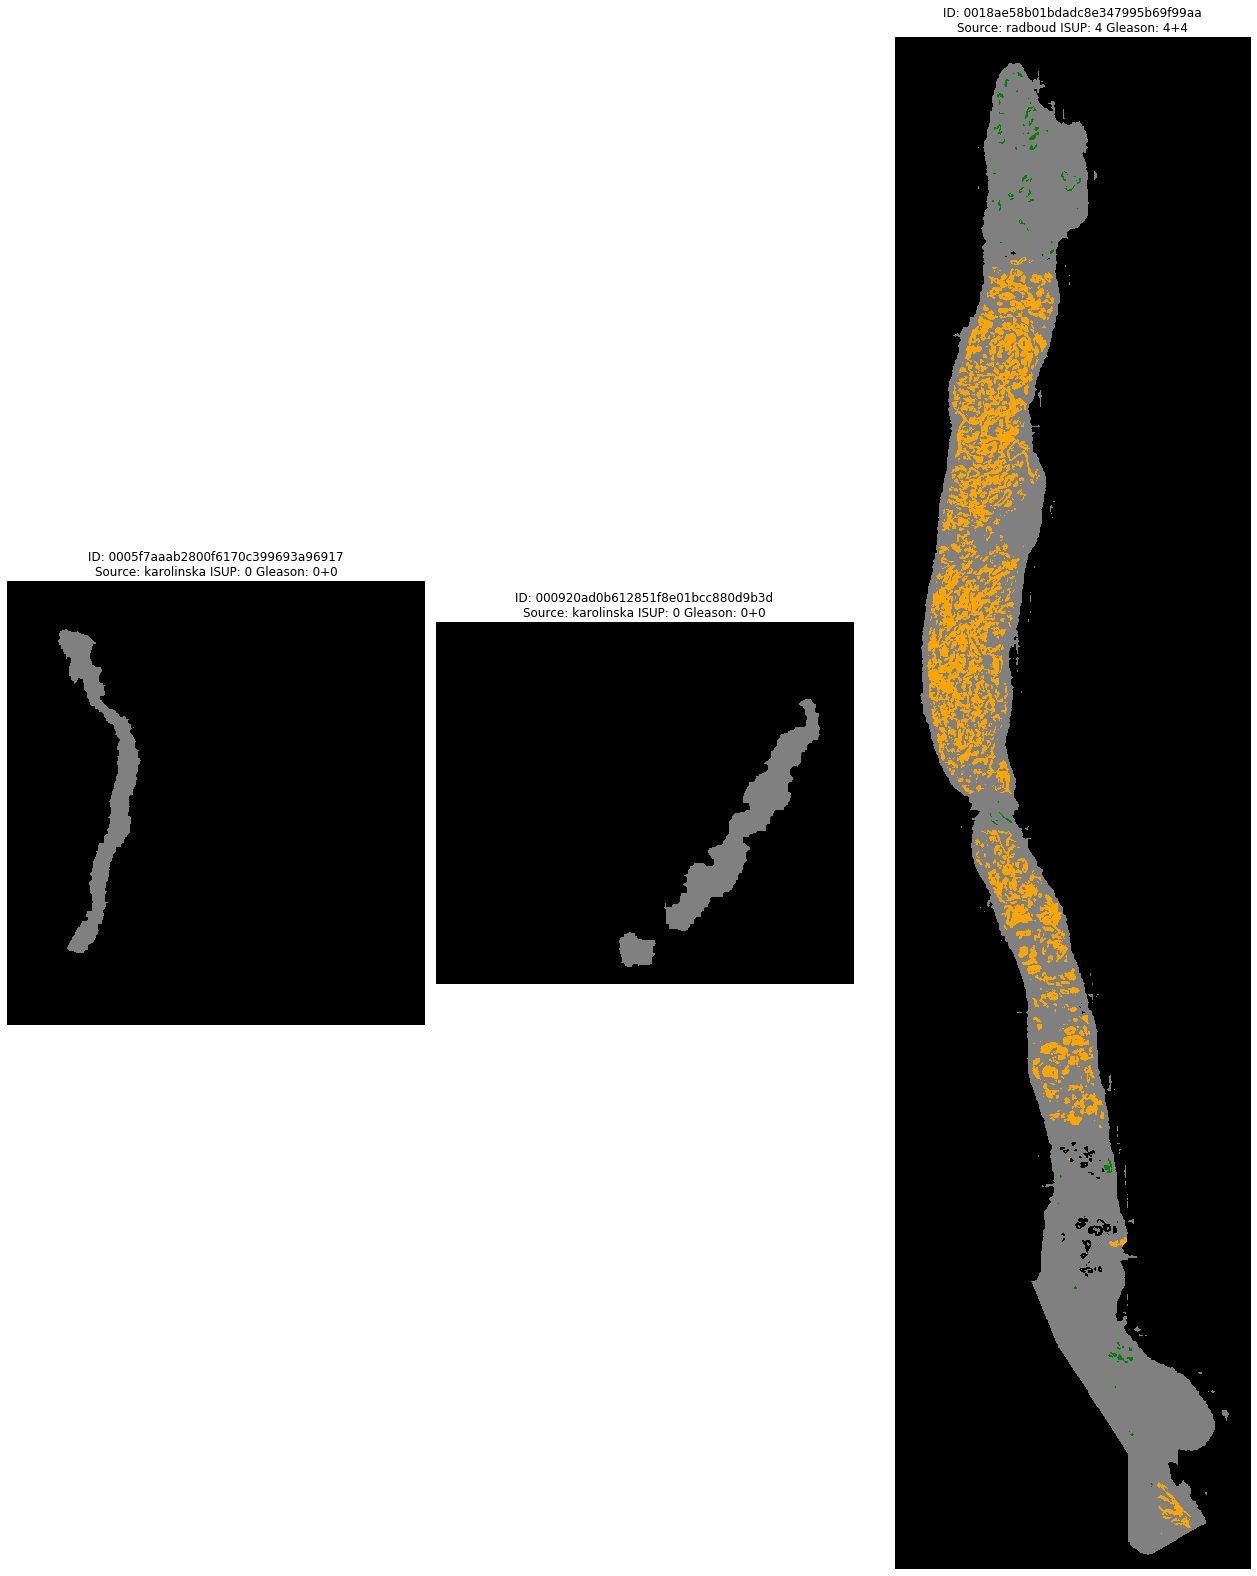

In [35]:
display_masks(images)

### Check for images without masks
As from [this](https://www.kaggle.com/c/prostate-cancer-grade-assessment/discussion/145574) discussion thread it is clear that there are 100 images which do not have any mask in the mask directory.

In [36]:
data_providers = ['karolinska', 'radboud']
train_df = pd.read_csv(f'{BASE_PATH}/train.csv')
masks = os.listdir(mask_dir)
masks_df = pd.Series(masks).to_frame()
masks_df.columns = ['mask_file_name']
masks_df['image_id'] = masks_df.mask_file_name.apply(lambda x: x.split('_')[0])
train_df = pd.merge(train_df, masks_df, on='image_id', how='outer')
del masks_df
print(f"There are {len(train_df[train_df.mask_file_name.isna()])} images without a mask.")

## removing items where image mask is null
train_df = train_df[~train_df.mask_file_name.isna()]

There are 10613 images without a mask.


### Displaying images and masks for each isup_grade category (on Server)

In [37]:
def load_and_resize_image(img_id):
    """
    Edited from https://www.kaggle.com/xhlulu/panda-resize-and-save-train-data
    """
    biopsy = skimage.io.MultiImage(os.path.join(data_dir, f'{img_id}.tiff'))
    return cv2.resize(biopsy[-1], (512, 512))

def load_and_resize_mask(img_id):
    """
    Edited from https://www.kaggle.com/xhlulu/panda-resize-and-save-train-data
    """
    biopsy = skimage.io.MultiImage(os.path.join(mask_dir, f'{img_id}_mask.tiff'))
    return cv2.resize(biopsy[-1], (512, 512))[:,:,0]

In [39]:
labels = []
for grade in range(train.isup_grade.nunique()):
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(22, 22))
    for i, row in enumerate(ax):
        idx = i//2
        temp = train_df[(train_df.isup_grade == grade) & (train_df.data_provider == data_providers[idx])].image_id.head(4).reset_index(drop=True)
        if i%2 < 1:
            labels.append(f'{data_providers[idx]} (image)')
            for j, col in enumerate(row):
                col.imshow(load_and_resize_image(temp[j]))
                col.set_title(f"ID: {temp[j]}")
                
        else:
            labels.append(f'{data_providers[idx]} (mask)')
            for j, col in enumerate(row):
                if data_providers[idx] == 'radboud':
                    col.imshow(load_and_resize_mask(temp[j]), 
                               cmap = matplotlib.colors.ListedColormap(['white', 'lightgrey', 'green', 'orange', 'red', 'darkred']), 
                               norm = matplotlib.colors.Normalize(vmin=0, vmax=5, clip=True))
                else:
                    col.imshow(load_and_resize_mask(temp[j]), 
                           cmap = matplotlib.colors.ListedColormap(['white', 'green', 'red']), 
                           norm = matplotlib.colors.Normalize(vmin=0, vmax=2, clip=True))
                    
                gleason_score = train.loc[temp[j], 'gleason_score']
                col.set_title(f"ID: {temp[j]}")
        
    for row, r in zip(ax[:,0], labels):
        row.set_ylabel(r, rotation=90, size='large', fontsize=14)

    plt.suptitle(f'ISUP Grade {grade}', fontsize=20)
    plt.show()

### Overlaying masks on the slides

As the masks have the same dimension as the slides, we can overlay the masks on the tissue to directly see which areas are cancerous. This overlay can help you identifying the different growth patterns. To do this, we load both the mask and the biopsy and merge them using PIL.

**Tip:** Want to view the slides in a more interactive way? Using a WSI viewer you can interactively view the slides. Examples of open source viewers that can open the PANDA dataset are [ASAP](https://github.com/computationalpathologygroup/ASAP) and [QuPath](https://qupath.github.io/). ASAP can also overlay the masks on top of the images using the "Overlay" functionality. If you use Qupath, and the images do not load, try changing the file extension to `.vtif`.

In [40]:
def overlay_mask_on_slide(images, center='radboud', alpha=0.8, max_size=(800, 800)):
    """Show a mask overlayed on a slide."""
    N = len(images)
    f, ax = plt.subplots(N//3,3, figsize=(18,22))

    for i, image_id in enumerate(images):
        if i > N // 3 * 3:
            break
        slide = openslide.OpenSlide(os.path.join(data_dir, f'{image_id}.tiff'))
        mask = openslide.OpenSlide(os.path.join(mask_dir, f'{image_id}_mask.tiff'))
        slide_data = slide.read_region((0,0), slide.level_count - 1, slide.level_dimensions[-1])
        mask_data = mask.read_region((0,0), mask.level_count - 1, mask.level_dimensions[-1])
        mask_data = mask_data.split()[0]
        
        
        # Create alpha mask
        alpha_int = int(round(255*alpha))
        if center == 'radboud':
            alpha_content = np.less(mask_data.split()[0], 2).astype('uint8') * alpha_int + (255 - alpha_int)
        elif center == 'karolinska':
            alpha_content = np.less(mask_data.split()[0], 1).astype('uint8') * alpha_int + (255 - alpha_int)

        alpha_content = PIL.Image.fromarray(alpha_content)
        preview_palette = np.zeros(shape=768, dtype=int)

        if center == 'radboud':
            # Mapping: {0: background, 1: stroma, 2: benign epithelium, 3: Gleason 3, 4: Gleason 4, 5: Gleason 5}
            preview_palette[0:18] = (np.array([0, 0, 0, 0.5, 0.5, 0.5, 0, 1, 0, 1, 1, 0.7, 1, 0.5, 0, 1, 0, 0]) * 255).astype(int)
        elif center == 'karolinska':
            # Mapping: {0: background, 1: benign, 2: cancer}
            preview_palette[0:9] = (np.array([0, 0, 0, 0, 1, 0, 1, 0, 0]) * 255).astype(int)

        mask_data.putpalette(data=preview_palette.tolist())
        mask_rgb = mask_data.convert(mode='RGB')
        overlayed_image = PIL.Image.composite(image1=slide_data, image2=mask_rgb, mask=alpha_content)
        overlayed_image.thumbnail(size=max_size, resample=0)
        
        if N // 3 > 1:
            ax[i//3, i%3].imshow(overlayed_image) 
            ax[i//3, i%3].axis('off')
        else:
            ax[i%3].imshow(overlayed_image) 
            ax[i%3].axis('off')
        slide.close()
        mask.close()       
        data_provider = train.loc[image_id, 'data_provider']
        isup_grade = train.loc[image_id, 'isup_grade']
        gleason_score = train.loc[image_id, 'gleason_score']
        
        if N // 3 > 1:
            ax[i//3, i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")
        else:
            ax[i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")

> Note: In the example below you can also observe a few pen markings on the slide (dark green smudges). These markings are not part of the tissue but were made by the pathologists who originally checked this case. These pen markings are available on some slides in the training set.

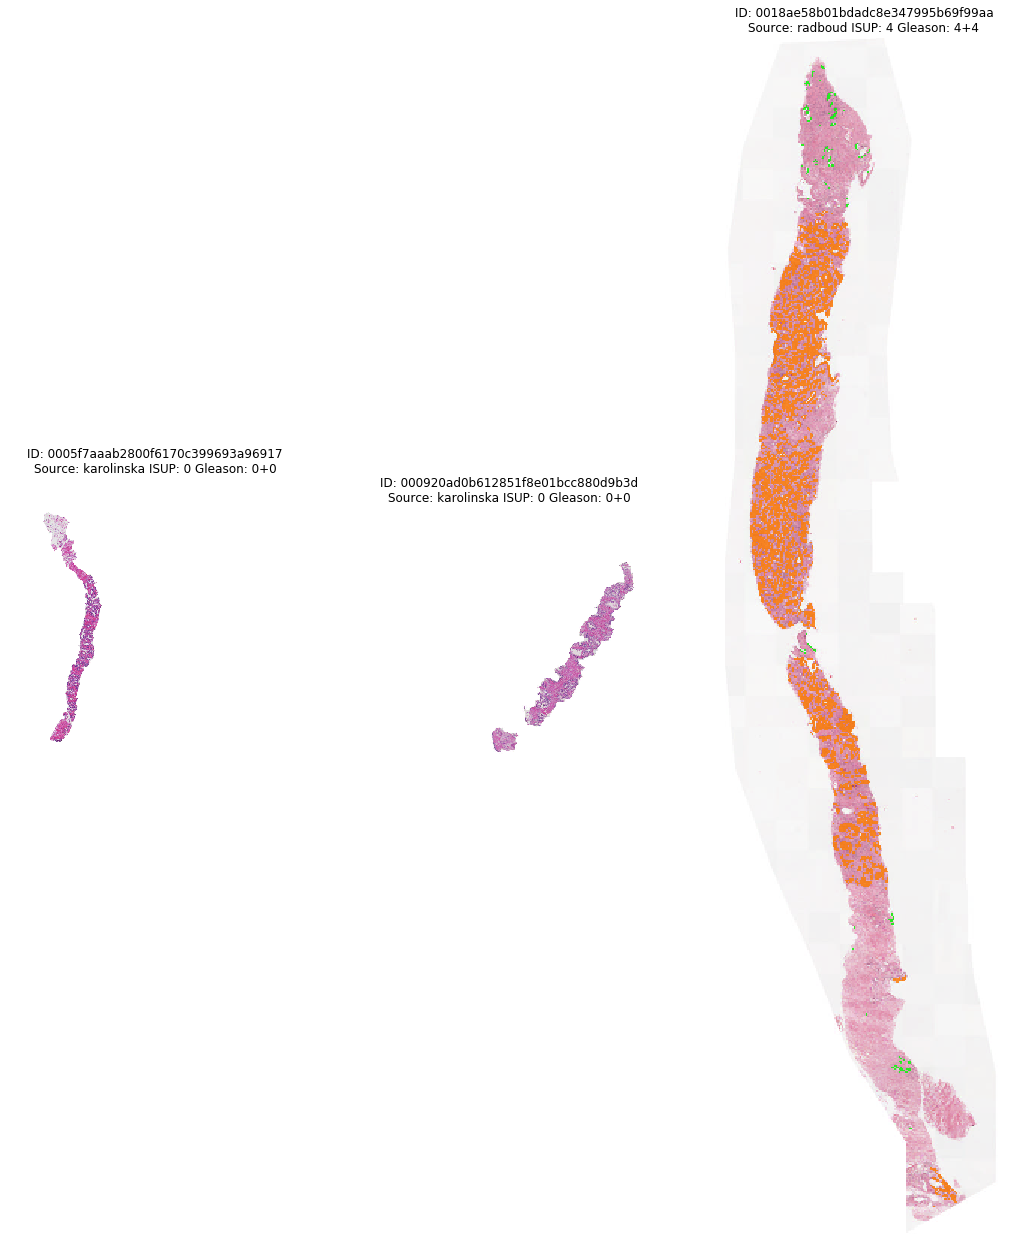

In [41]:
overlay_mask_on_slide(images)

## 6. Exploring images with pen markers

It is mentioned [here](https://www.kaggle.com/c/prostate-cancer-grade-assessment/data) that in training dataset, there are few images with pen markers on them. The organizers left us with a Note as described below.


> Note that slightly different procedures were in place for the images used in the test set than the training set. Some of the training set images have stray pen marks on them, but the test set slides are free of pen marks.

Let's take a look on few of these images.

In [43]:
pen_marked_images = [
    'fd6fe1a3985b17d067f2cb4d5bc1e6e1',
    'ebb6a080d72e09f6481721ef9f88c472',
    'ebb6d5ca45942536f78beb451ee43cc4',
    'ea9d52d65500acc9b9d89eb6b82cdcdf',
    'e726a8eac36c3d91c3c4f9edba8ba713',
    'e90abe191f61b6fed6d6781c8305fe4b',
    'fd0bb45eba479a7f7d953f41d574bf9f',
    'ff10f937c3d52eff6ad4dd733f2bc3ac',
    'feee2e895355a921f2b75b54debad328',
    'feac91652a1c5accff08217d19116f1c',
    'fb01a0a69517bb47d7f4699b6217f69d',
    'f00ec753b5618cfb30519db0947fe724',
    'e9a4f528b33479412ee019e155e1a197',
    'f062f6c1128e0e9d51a76747d9018849',
    'f39bf22d9a2f313425ee201932bac91a',
]

overlay_mask_on_slide(pen_marked_images)